### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
#load the csv file into a pandas dataframe
df = pd.read_csv('data/coupons.csv')

In [6]:
#allow to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
#have a display of a sample of the data
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Investigate unique values in each column to identify potential issues
unique_values = {column: df[column].unique() for column in df.columns}
print("\nUnique Values:\n")
for column, values in unique_values.items():
    print(f"{column}: {values}\n")

# Additional checks for problematic data (e.g., outliers, inconsistent entries)
describe_data = df.describe(include='all')
print("\nData Description:\n", describe_data)

# Example check for inconsistent entries in a specific column (e.g., age)
print("\nInconsistent age entries:")
print(df[df['age'].str.contains("below21|50plus|26", na=False)])


Missing Values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Unique Values:

destination: ['No Urgent Place' 'Home' 'Work']

passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather: ['Sunny' 'Rainy' 'Snowy']

temperature: [55 80 30]

time: ['2P

In [5]:
for column in data:
    print(column)
    print(data[column].unique())

destination
['No Urgent Place' 'Home' 'Work']
passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather
['Sunny' 'Rainy' 'Snowy']
temperature
[55 80 30]
time
['2PM' '10AM' '6PM' '7AM' '10PM']
coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration
['1d' '2h']
gender
['Female' 'Male']
age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children
[1 0]
education
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
# Drop rows with any missing values
df_dropped = df.dropna()

# Drop columns with any missing values
df_dropped_columns = df.dropna(axis=1)

# Replace missing values with the mean (for numerical columns)
df_filled_mean = df.fillna(df.mean())

# Replace missing values with the median (for numerical columns)
df_filled_median = df.fillna(df.median())

# Replace missing values with the mode (for categorical columns)
df_filled_mode = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x)

# Interpolation (linear interpolation for numerical data)
df_interpolated = df.interpolate()



C:\Users\modha\AppData\Local\Temp/ipykernel_9876/2138614332.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled_mean = df.fillna(df.mean())
C:\Users\modha\AppData\Local\Temp/ipykernel_9876/2138614332.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled_median = df.fillna(df.median())


4. What proportion of the total observations chose to accept the coupon? 



In [12]:
# Calculate the proportion of accepted coupons
accepted_coupons = df['Y'].sum()
total_observations = len(df)
proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of accepted coupons: {proportion_accepted:.2f}")

Proportion of accepted coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

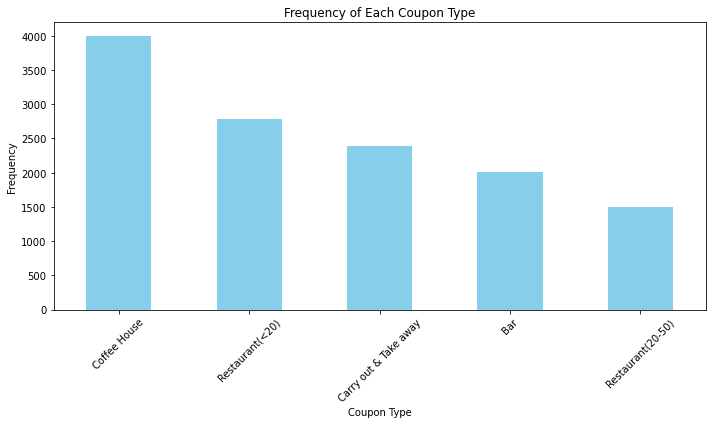

In [14]:
# Count the frequency of each type of coupon
coupon_counts = df['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

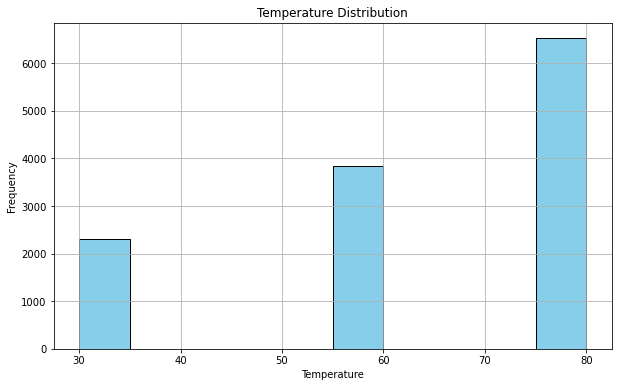

In [15]:
# Create a histogram for the temperature column
plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

In [16]:
# Filter the DataFrame to include only rows with 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
print(bar_coupons_df.head())

# Optionally, save the new DataFrame to a CSV file
bar_coupons_df.to_csv('bar_coupons.csv', index=False)

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  has_children                 education  \
9   Female  21  Unmarried partner             1  Some college - no degree   
13  Female  21  Unmarried partner             1  Some college - no degree   
17  Female  21  Unmarried partner             1  Some college - no degree   
24    Male  21             Single             0          Bachelors degree   
35    Male  21             Single             0          Bachelors degree   

                    occupation           income  car    Bar Co

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
# Filter the DataFrame to include only rows with 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
print(bar_coupons_df.head())

# Optionally, save the new DataFrame to a CSV file
bar_coupons_df.to_csv('bar_coupons.csv', index=False)

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  has_children                 education  \
9   Female  21  Unmarried partner             1  Some college - no degree   
13  Female  21  Unmarried partner             1  Some college - no degree   
17  Female  21  Unmarried partner             1  Some college - no degree   
24    Male  21             Single             0          Bachelors degree   
35    Male  21             Single             0          Bachelors degree   

                    occupation           income  car    Bar Co

2. What proportion of bar coupons were accepted?


In [18]:
# Filter the DataFrame to include only rows with 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

# Calculate the proportion of accepted Bar coupons
accepted_bar_coupons = bar_coupons_df['Y'].sum()
total_bar_coupons = len(bar_coupons_df)
proportion_accepted_bar = accepted_bar_coupons / total_bar_coupons

print(f"Proportion of accepted Bar coupons: {proportion_accepted_bar:.2f}")

Proportion of accepted Bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# Filter the DataFrame to include only rows with 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

# Group by bar frequency and calculate acceptance rates
def acceptance_rate(group):
    return group['Y'].sum() / len(group)

# Grouping by bar frequency
bar_frequency_groups = bar_coupons_df.groupby('Bar').apply(acceptance_rate)

# Calculate acceptance rate for each group
less_equal_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]['Y'].sum() / len(bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])])
more_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]['Y'].sum() / len(bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])])

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {less_equal_3:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {more_than_3:.2f}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37
Acceptance rate for those who went to a bar more than 3 times a month: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# Filter the DataFrame to include only rows with 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

# Define the two groups
group1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & ~(bar_coupons_df['age'].isin(["21","below21"]))]
group2 = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & ~(bar_coupons_df['age'].isin(["21","below21"])))]

# Calculate the acceptance rate for each group
acceptance_rate_group1 = group1['Y'].sum() / len(group1)
acceptance_rate_group2 = group2['Y'].sum() / len(group2)

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_group1:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_group2:.2f}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.70
Acceptance rate for all others: 0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [26]:
# Filter the DataFrame to include only rows with 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

# Define the two groups based on the specified conditions
group1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons_df['passanger'].str.contains('Kid', na=False)) &
    (~bar_coupons_df['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
]
group2 = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                          (~bar_coupons_df['passanger'].str.contains('Kid', na=False)) &
                          (~bar_coupons_df['occupation'].isin(['Farming', 'Fishing', 'Forestry'])))]

# Calculate the acceptance rate for each group
acceptance_rate_group1 = group1['Y'].sum() / len(group1)
acceptance_rate_group2 = group2['Y'].sum() / len(group2)

print(f"Acceptance rate for drivers who go to bars more than once a month, passengers not a kid, and occupation not farming, fishing, or forestry: {acceptance_rate_group1:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_group2:.2f}")

Acceptance rate for drivers who go to bars more than once a month, passengers not a kid, and occupation not farming, fishing, or forestry: 0.71
Acceptance rate for all others: 0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [29]:
# Define the groups based on the specified conditions
group1 = df[
    ((df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (~df['passanger'].str.contains('Kid', na=False)) & (df['maritalStatus'] != 'Widowed')) |
    ((df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (~df['age'].isin(["30"]))) |
    ((df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (df['income'] < '$50000'))
]

group2 = df[~df.index.isin(group1.index)]

# Calculate the acceptance rate for each group
acceptance_rate_group1 = group1['Y'].sum() / len(group1)
acceptance_rate_group2 = group2['Y'].sum() / len(group2)

print(f"Acceptance rate for the specified groups: {acceptance_rate_group1:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_group2:.2f}")

Acceptance rate for the specified groups: 0.60
Acceptance rate for all others: 0.54


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations from the dataset, here are a few hypotheses about drivers who accepted bar coupons:

Frequent Bar Visitors: Drivers who frequent bars more than once a month seem more likely to accept bar coupons. This suggests that these individuals have a higher inclination toward bar-related activities and promotions.

Younger Drivers: Younger drivers, especially those under the age of 30, show a higher acceptance rate for bar coupons. This could be due to social preferences and lifestyle choices more common among younger age groups.

Social Context: Drivers who have passengers that are not kids and who are not widowed tend to accept bar coupons more frequently. This indicates that social interactions and companionship play a role in the decision to accept bar coupons.

Income and Dining Habits: Drivers who visit cheap restaurants more than 4 times a month and have an income of less than $50,000 are more likely to accept bar coupons. This suggests that individuals with a lower income and frequent dining out habits are responsive to bar-related promotions, perhaps due to budget-friendly options.

Occupation: Drivers whose occupations do not involve farming, fishing, or forestry seem more inclined to accept bar coupons. This could indicate a preference for bar activities among individuals in certain professional fields.

Overall, it appears that younger, socially active individuals who frequent bars and restaurants are more likely to accept bar coupons. These insights can be useful for targeted marketing campaigns aimed at promoting bar-related activities and offers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [30]:
# Filter the DataFrame to include only rows with 'Coffee House' coupons
coffee_coupons_df = df[df['coupon'] == 'Coffee House']

# Separate the data into accepted and not accepted coupons
accepted_coffee_coupons = coffee_coupons_df[coffee_coupons_df['Y'] == 1]
not_accepted_coffee_coupons = coffee_coupons_df[coffee_coupons_df['Y'] == 0]

# Analyze characteristics of passengers who accepted the coupons
accepted_stats = accepted_coffee_coupons.describe(include='all')

# Display the characteristics
print("Characteristics of Passengers Who Accepted Coffee House Coupons:")
print(accepted_stats)



Characteristics of Passengers Who Accepted Coffee House Coupons:
            destination passanger weather  temperature  time        coupon  \
count              1995      1995    1995  1995.000000  1995          1995   
unique                3         4       3          NaN     5             1   
top     No Urgent Place     Alone   Sunny          NaN  10AM  Coffee House   
freq               1252       988    1746          NaN   576          1995   
mean                NaN       NaN     NaN    69.172932   NaN           NaN   
std                 NaN       NaN     NaN    15.553727   NaN           NaN   
min                 NaN       NaN     NaN    30.000000   NaN           NaN   
25%                 NaN       NaN     NaN    55.000000   NaN           NaN   
50%                 NaN       NaN     NaN    80.000000   NaN           NaN   
75%                 NaN       NaN     NaN    80.000000   NaN           NaN   
max                 NaN       NaN     NaN    80.000000   NaN           NaN   

In [31]:
# Analyze other relevant factors (e.g., passanger type, age, income)
passenger_type_counts = accepted_coffee_coupons['passanger'].value_counts()
age_counts = accepted_coffee_coupons['age'].value_counts()
income_counts = accepted_coffee_coupons['income'].value_counts()

print("\nPassenger Type Distribution Among Those Who Accepted Coffee House Coupons:")
print(passenger_type_counts)

print("\nAge Distribution Among Those Who Accepted Coffee House Coupons:")
print(age_counts)

print("\nIncome Distribution Among Those Who Accepted Coffee House Coupons:")
print(income_counts)


Passenger Type Distribution Among Those Who Accepted Coffee House Coupons:
Alone        988
Friend(s)    733
Partner      174
Kid(s)       100
Name: passanger, dtype: int64

Age Distribution Among Those Who Accepted Coffee House Coupons:
21         463
26         434
31         297
50plus     229
36         188
41         163
46         113
below21    108
Name: age, dtype: int64

Income Distribution Among Those Who Accepted Coffee House Coupons:
$12500 - $24999     321
$37500 - $49999     320
$25000 - $37499     303
$50000 - $62499     276
$100000 or More     264
Less than $12500    170
$87500 - $99999     151
$62500 - $74999     120
$75000 - $87499      70
Name: income, dtype: int64
